In [3]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras

import numpy as np
from numpy import load
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Load dataset

In [4]:
np.random.seed(42)

n_steps = 60
series = load('univariate-time-series-1-step.npy')

X_train, y_train = series[:9000, :n_steps], series[:9000, -1] # -1 references the last column
X_valid, y_valid = series[9000:11000, :n_steps], series[9000:11000, -1]
X_test, y_test = series[11000:, :n_steps], series[11000:, -1]


In [5]:
series.shape

(12000, 61, 1)

In [6]:
X_train.shape, y_train.shape

((9000, 60, 1), (9000, 1))

Saving figure time_series_plot


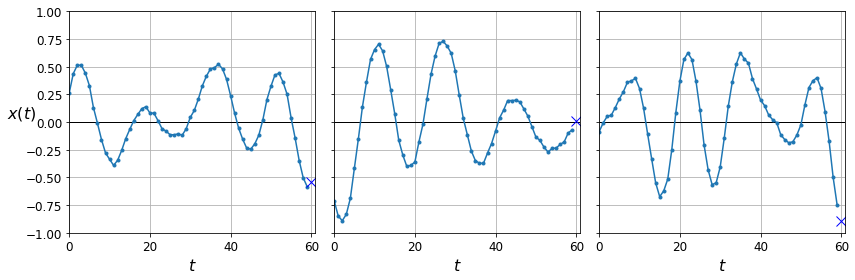

In [7]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
save_fig("time_series_plot")
plt.show()

Linear predictions:

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

#Replace this with your RNN code

model = keras.models.Sequential([    

    keras.layers.LSTM(60),
    keras.layers.Flatten(input_shape=[60, 1]),
    keras.layers.Dense(60, activation= 'relu'),
    keras.layers.Dropout(.15),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
282/282 [==============================] - 12s 18ms/step - loss: 0.0154 - val_loss: 0.0025
Epoch 2/20
282/282 [==============================] - 4s 16ms/step - loss: 0.0034 - val_loss: 0.0014
Epoch 3/20
282/282 [==============================] - 4s 16ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 4/20
282/282 [==============================] - 4s 15ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 5/20
282/282 [==============================] - 4s 15ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 6/20
282/282 [==============================] - 4s 16ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 7/20
282/282 [==============================] - 4s 16ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 8/20
282/282 [==============================] - 4s 16ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 9/20
282/282 [==============================] - 4s 15ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 10/20
282/282 [==============================] - 4s 16ms/step - loss: 0.0021 - val_l

In [9]:
model.evaluate(X_test, y_test)


32/32 [==============================] - 0s 6ms/step - loss: 9.9433e-04


0.0009943335317075253

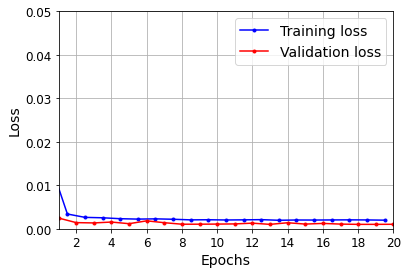

In [10]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

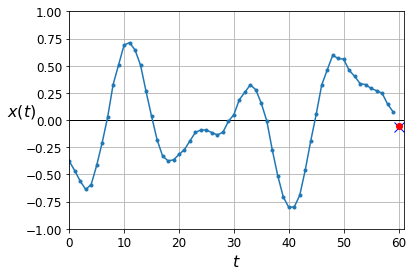

In [11]:
y_pred = model.predict(X_test)
plot_series(X_test[15, :, 0], y_test[15, 0], y_pred[15, 0])
plt.show()